<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_DS/DS_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

## Seabornとは
**Seaborn**もmatplotlibと同じように、データの可視化をするライブラリです。  
中でmatplotlibを使っていますが、よりきれいに表示することができます。より実践的です。

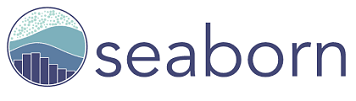

これまでに比べると量が少ないと思います。

GoogleColabやJupyter Labといった環境下では、最初から入っているため改めて入れる必要はありません。  
自分で入れる場合は`conda install seaborn`や`pip install seaborn`という記述をします。

Seabornをimportする際、`sns`とするのが一般的です。

In [ ]:
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ヒストグラム
matplotlibでも学習したヒストグラムです。最頻出です。


In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

### sns.histplot()
ヒストグラムを作るには**`sns.histplot()`**関数を使います。  
今回も前回と同様、`popularity`カラムのデータを作成します。

In [ ]:
sns.histplot(df["popularity"])

何か線が引いてありますが、これは**確率密度変数**（[こちら](https://bellcurve.jp/statistics/glossary/811.html)など参照、今は気にしなくていいです）を推定したものです。  


matplotlibの時と同様、引数**bins**を指定することができます。

In [ ]:
sns.histplot(df["vote_average"] , bins=50)

[こちら](https://bit.ly/3SbLELA)にもう少し詳しい解説がありますので、興味のある方は是非。

### sns.displot()
2変量のヒストグラムを取得したい場合は、**`sns.displot()`**関数を使います。  
今回は`revenue`カラムと`budget`カラムのデータを作成します。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df = df[(df["original_language"]== "fr")]    #データ数を考慮し、フランス映画に限定します

In [ ]:
df = df[(df["revenue"] != 0) & (df["budget"] != 0)]    #0のカラムは削除
sns.displot(df,x="revenue" , y="budget",alpha=1)

フランス映画は、低予算・低収入のものを除けば、どちらかというと儲かっている映画の方が大きいことが分かります。  
データ量を見ることができるのが大きな特徴です。

### sns.jointplot()
2変数の分布を見ることができます。  
散布図とヒストグラムの両方を可視化できるのが特徴です。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df = df[(df["revenue"] != 0) & (df["budget"] != 0)] 
sns.jointplot(x="revenue" , y="budget" , data=df , alpha=0.2)

基本的に興行収入が高い映画は、比較的予算が高い映画であると分かります。  
データの偏りが分かりやすくなったと思います。

引数**`kind`**で**`reg`**と指定すると、2変数の大まかな関係を線で引くことができます。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df = df[(df["revenue"] != 0) & (df["budget"] != 0)] 
sns.jointplot(x="revenue" , y="budget" , data=df , kind="reg" , joint_kws={"scatter_kws":dict(alpha=0.2)})    #透明度の設定は少し複雑

興行収入が高い映画は、予算が高い映画であるものが多いという関係が明らかになりました。

引数`kind`を**`hex`**と指定すると、散布図を六角形のヒートマップ形式で表示します。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df = df[(df["revenue"] != 0) & (df["budget"] != 0)] 
sns.jointplot(x="revenue" , y="budget" , data=df , kind="hex") 

データの重なり具合がより分かりやすくなったと思います。

### sns.pairplot()
Seabornの中で再頻出の関数です。  
DataFrame内にある全ての数値項目のペアのplotを表示できます。


In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
sns.pairplot(df)

同じカラムが交差するところは、そのカラムのヒストグラムが表示されます。

不要なカラムは除くこともあります。必要なカラムのみ指定しましょう。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
# 100未満は信頼性が低いとする
df = df[df['vote_count'] > 100]
sns.pairplot(df[["revenue" , "budget" , "vote_count" , "vote_average"]])

`pairplot`では引数**`hue`**を使ってデータの色分けをすることが多いです。  
カテゴリごとにマーカーの色を変えることができます。

In [ ]:
#平均評価の中央値を求める
vote_average_median = df['vote_average'].median()    #処理が重いので別変数にする

#平均評価が中央値以下であればlow、中央値以上であればhigh
df["evaluation"] = df["vote_average"].apply(lambda x: "high" if x> vote_average_median else "low")
sns.pairplot(df[["revenue" , "budget" , "vote_count" , "vote_average","evaluation"]],
             hue="evaluation",
             plot_kws={'alpha':0.5},    #透明度の設定は少し複雑
             #diag_kind='hist'    #ヒストグラムのグラフの種類を変更できる
             )

## Categorical Plot
カテゴリーの値が入ったカラムに対してのplotを**Categorical Plot**といいます。  
いくつか用意されています。

### sns.barplot()
カテゴリーごとに分けて、指定したカラムの平均値を比較する棒グラフを作ることができます。

In [ ]:
# 上で作ったevaluationカラムを使います

#evaluationのカテゴリ別に、興行収入の平均値を算出
sns.barplot(x="evaluation" , y="revenue" , data=df)

引かれている黒い線はError Barと呼ばれ、不確かさを表します。  
今はそんなにこだわる必要はなさそうです。

平均値以外の値を比較したい場合は、引数**`estimator`**を使います。  
Numpyの関数で指定します。

In [ ]:
#evaluationのカテゴリ別に、興行収入の中央値を算出
sns.barplot(x="evaluation" , y="revenue" , data=df , estimator=np.median)

### sns.countplot()
データの数を単純にカテゴリ別に比べます。

**`year`**というカラムを作って、西暦別にデータの数をカウントしましょう。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df = df[df['vote_count'] > 100]

vote_average_median = df['vote_average'].median() 
df["evaluation"] = df["vote_average"].apply(lambda x: "high" if x> vote_average_median else "low")

In [ ]:
#release_dateカラムの先頭から4文字を取り出す
df["year"] = df["release_date"].apply(lambda x: x[:4])
sns.countplot(x="year" , data=df.sort_values("year"))    #sortして年を奇麗に並べる

x軸の値の量が多いために重なっており、かなり見にくいグラフになっています。



`countplot()`を含むSeabornのplotは、戻り値が`axes`のオブジェクトであるために、  
matplotlibの`axes`に対して行っていた操作が可能になります。

In [ ]:
ax = sns.countplot(x='year', data=df, hue='evaluation')
ax.tick_params(rotation=90 , labelsize=6)

引数**`hue`**を指定すると、西暦別のカウントに加えて、`evaluation`別に色分けされてカウントが表示されます。  
また、今回初登場の**`tick_params`**については[こちら](https://bit.ly/3qLFRkf)を参考にしてください。

これでもまだカテゴリ量が多いためにグラフの見にくさは改善されていません。  
そのため、10年ごとに西暦を区切った新しいカテゴリを作りましょう。

In [ ]:
#release_dateカラムの先頭から3文字を取り出す 例：2013 -> 2010s
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

直接pltで付加情報を付け加えることが可能です。（ビックリです！）

In [ ]:
#release_dateカラムの先頭から3文字を取り出す 例：2013 -> 2010s
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

sns.countplot(x='decade', data=df.sort_values('decade'), hue='evaluation')

plt.xlabel("x")
plt.ylabel("y")
plt.xticks(rotation=45)

### sns.boxplot()
matplotlibでも学習した箱ひげ図と同じですが、  
Seabornの方が使い勝手の良さと綺麗さからよく好まれるようです。

In [ ]:
sns.boxplot(x="decade" , y="vote_average" ,data=df.sort_values("decade"))

年代が進むにつれて平均評価が落ちていくことが分かります。  

これは、昔の映画で今もデータが残っている映画は名作が多いことが理由として考えられます。

### sns.violinplot()
データの分布に応じて箱の形を変えることができます。  

平均にデータが集まることが多いために、バイオリンのような形になるため`violinplot`と呼びます。

In [ ]:
sns.violinplot(x="decade",y="vote_average" , data=df.sort_values("decade"))

統計量の比較だけを把握したい場合は`boxplot`を、  
全体の分布の様子を把握したい場合は`violinplot`を使うようにしましょう。

引数`split`をTrueに、引数`inner`を`quart`にすることで、見やすいグラフが完成します。

In [ ]:
sns.violinplot(x="decade",y="vote_average" , data=df.sort_values("decade") , split=True , inner="quart")

### sns.swarmplot()
violinplotでは表示しているのは密度であるため、実際の映画の数を比較することができません。  

そこで使うのが**swarmplot**です。実際の分布をみることができます。

In [ ]:
sns.swarmplot(x="decade",y="vote_average" , data=df.sort_values("decade") )

1920s～1950sのデータ数の少なさが一目で分かるようになりました。

1980s以降はデータ数が多くなっています。  
このようなときはプロットの全体のサイズを変える必要があります。

In [ ]:
fig , ax = plt.subplots(figsize=(20,5))    #swarmplot以外でも調節可能
ax.tick_params(labelsize=30)
sns.swarmplot(x="decade",y="vote_average" , data=df.sort_values("decade") )

マーカーのサイズを変えることもあります。

In [ ]:
fig , ax = plt.subplots(figsize=(20,5))    #swarmplot以外でも調節可能
ax.tick_params(labelsize=30)
sns.swarmplot(x="decade",y="vote_average" , data=df.sort_values("decade"),size=2 )

swarmplotでは統計量は出てきません。  
boxplotやviolinplotと、特性を考えながら合わせて使うようにしましょう。

## ヒートマップ
表の各値の大きさに応じて色付けした図を**ヒートマップ**といいます。  
一目で値の大きさが分かります。また、データの傾向を見ることができます。

ヒートマップは、**データサイエンスでは大変よく使われる図**です。  
　・相関表：各カラム間の相関を示すもの（[こちら](https://bit.ly/3BRAh6c)で**相関係数**について学ぶことができます。     
　・混同行列：分類器の分類を表にしたもの（今は気にしなくてOK）



今回は実際に相関表を作り、ヒートマップを見ていきましょう。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.corr()    #相関表の作成

続いて値が0のものを除いて相関表を作ります。

In [ ]:
df != 0

汚いデータをなるべく排除した状態で相関係数を求めたいため、全てのカラムが0ではない行だけ残すようにしましょう。

そのため、上の表の内、1つでもFalseがあったらその行を除きましょう。

In [ ]:
(df != 0).all(axis=1)    #axis=1を指定することで行単位で判断する

In [ ]:
df.loc[(df != 0).all(axis=1)]    #ただのdfでも同じ結果になる
df.corr()

あとは**`sns.heatmap()`**の中にこの相関表を入れるだけです。

In [ ]:
sns.heatmap(df.corr())

引数**`annot`**をTrueに指定すると、各マスに数値を入れてくれます。原則つけるようにしましょう。  

また、引数**`cmap`**にカラーマップを指定すると色のグラデ―ジョンを指定できます。  `coolwarm`や`hot`、`plasma`などが有名です。

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

## Seabornの装飾と付属情報
matplotlibでも同じような話がありましたが、Seabornはそもそもデフォルトできれいなグラフが描けるので、  
仕様頻度はそこまで高くないかもしれません。


### sns.set()
**`sns.set()`**のパラメータを加えることで、グラフを装飾できます。

#### context
引数`context`は**`paper`**、**`notebook`**、**`talk`**、**`poster`**の4つの値を取ります。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
sns.set(context="notebook")
#sns.set_context("notebook")  でも同意
sns.histplot(df["vote_average"])

プレゼンなどを想定し、文字を大きくしたい場合は`poster`を使うことが多いです。  
そうでない場合はデフォルトである`notebook`で問題ないようです。

In [ ]:
sns.set(context="poster")
#sns.set_context("poster")  でも同意
sns.histplot(df["vote_average"])

#### style
引数`style`は**`darkgrid`**、**`whitegrid`**、**`dark`**、**`white`**、**`ticks`**の5つの値を取ります。

In [ ]:
sns.set(context="notebook" , style="darkgrid")
sns.histplot(df["vote_average"])

デフォルトは`darkgrid`ですが、好みのものを使うようにしましょう。

`ticks`を指定した場合はplotに軸と枠ができますが、  
**`sns.despine()`**を使うと軸を消すことができます。

In [ ]:
sns.set(context="notebook" , style="ticks")
sns.histplot(df["vote_average"])
sns.despine()

引数には**`top`**、**`right`**、**`left`**、**`bottom`**をbool型の値で指定できます。  
指定するとそれぞれを表示を切り替えることができます。デフォルトは`top`、`right`がTrueになっています。

#### palette
色のパレットを指定することができます。  
先ほど引数`cmap`に指定していたものになります。

ここでは、横軸を`decade`カラム（年代）、縦軸を`popularity`カラム（人気）にして、年代ごとに人気のviolinplotをしましょう。  
続いて、引数`hue`に`evaluation`カラムを指定して、各年代に2つのviolinplotをしましょう。

In [ ]:
# 公式ページ：https://bit.ly/3UgIqIB

sns.set(context="notebook" , style="ticks" , palette="dark")

df = df.dropna(subset=["release_date"])
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

vote_average_median = df['vote_average'].median() 
df["evaluation"] = df["vote_average"].apply(lambda x: "high" if x> vote_average_median else "low")

sns.violinplot(x="decade" , y="popularity" , data=df.sort_values("decade") , hue="evaluation")

`sns.set()`内で指定した`palette`は、**hueの色にしか適用されません**。少し見にくいと思います。  

violinplot自体の色を変えたいときは、violinplot内で引数`palette`を指定しましょう。

In [ ]:
# 公式ページ：https://bit.ly/3UgIqIB

sns.set(context="notebook" , style="ticks" , palette="bright")

df = df.dropna(subset=["release_date"])
df['decade'] = df['release_date'].apply(lambda x: x[:3] + '0s')

vote_average_median = df['vote_average'].median() 
df["evaluation"] = df["vote_average"].apply(lambda x: "high" if x> vote_average_median else "low")

plt.figure(figsize=(10, 5))    #横に長くしたかったのでサイズ調整           
sns.violinplot(x="decade" , y="popularity" , 
               data=df.sort_values("decade") , 
               hue="evaluation" , 
               palette="bright"    #興味があれば"hsv"、"twilight"などに変更してみて下さい
               )

### 付属情報
**Seabornは中でmatplotlibを含んでいる**ので、同じようにタイトルや軸の名前を指定することができます。  

同じようにして、**`plt.savefig()`**で保存も可能です。

In [ ]:
sns.set(context="poster")
sns.histplot(df["vote_average"])
plt.title("Distribution of scores")
plt.xlabel("Evaluation Scores")
plt.savefig("Evaluation_sample.png")    #オブジェクト指向の方法でももちろん可能